# Biodiversity in National Parks

Analyzing some data about species at various national parks.
Data is *inspired* by real data, but is mostly fictional.

https://www.codecademy.com/paths/data-science/tracks/data-analysis-capstone-projects/modules/data-analysis-capstone-projects/informationals/ida-capstone-biodiversity

# #1

In [1]:
# Importing modules

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# Loading data into dataframe
species = pd.read_csv('species_info.csv')

In [4]:
# Inspecting data
# 1- Overall dataset's structure 
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
# Inspecting data
# 2- Specific questions about the data 

In [6]:
# How many different species are represented. 
species.scientific_name.nunique()

5541

In [7]:
# What are the different values of categories in species. 
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [8]:
# What are the different values of conservation status. 
species.conservation_status.unique()


array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [9]:
# Counting how many species are there per conservation status  
scientific_count = species.groupby('conservation_status')\
.scientific_name.nunique().reset_index()
scientific_count

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


Out of the 5,541 species that are gathered in the dataset, only 180 are attributed a conservation status. 
Will create a status to designate the ones that are not classified.

In [10]:
# Classifying the None status as "No Intervention"
species.fillna('No Intervention', inplace=True)

In [11]:
species.groupby('conservation_status').scientific_name.nunique()\
.reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


In [12]:
# Sorting values to easily view how many species there are per category
protection_counts = species.groupby('conservation_status')\
.scientific_name.nunique().reset_index()\
.sort_values(by='scientific_name')

print(protection_counts)

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               15
3  Species of Concern              151
2     No Intervention             5363


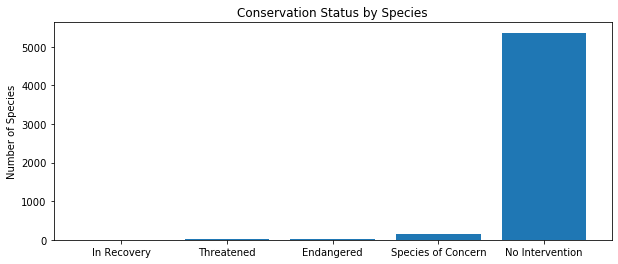

In [13]:
# Plotting bar chart to review these figures 
plt.figure(figsize=(10,4))
ax = plt.subplot()

plt.bar(range(len(protection_counts['conservation_status'])), protection_counts['scientific_name'])
ax.set_xticks(range(len(protection_counts['conservation_status'])))
ax.set_xticklabels(protection_counts['conservation_status'])
plt.ylabel('Number of Species')
plt.title("Conservation Status by Species")
plt.show()

In [14]:
# Reviewing if some categories of species are more likely to be endangered

In [15]:
species['is_protected'] = species['conservation_status']\
.apply(lambda x: True if x != 'No Intervention' else False)




In [16]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.count().reset_index()


In [17]:
# Re-arranging the data into a pivot table for better clarification
category_pivot = category_counts.pivot(columns='is_protected' ,
                                       index='category',
                                       values='scientific_name'
).reset_index()

In [18]:
print(category_pivot)

is_protected           category  False  True
0                     Amphibian     73     7
1                          Bird    442    79
2                          Fish    116    11
3                        Mammal    176    38
4             Nonvascular Plant    328     5
5                       Reptile     74     5
6                Vascular Plant   4424    46


In [19]:
category_pivot.columns = ["category", "not_protected", "protected"]
print(category_pivot)

            category  not_protected  protected
0          Amphibian             73          7
1               Bird            442         79
2               Fish            116         11
3             Mammal            176         38
4  Nonvascular Plant            328          5
5            Reptile             74          5
6     Vascular Plant           4424         46


In [20]:
category_pivot['percent_protected'] = category_pivot['protected'] \
/ (category_pivot['protected'] + category_pivot['not_protected'])


In [21]:
print(category_pivot)

            category  not_protected  protected  percent_protected
0          Amphibian             73          7           0.087500
1               Bird            442         79           0.151631
2               Fish            116         11           0.086614
3             Mammal            176         38           0.177570
4  Nonvascular Plant            328          5           0.015015
5            Reptile             74          5           0.063291
6     Vascular Plant           4424         46           0.010291


The Mammal species seem to be more likely endangered than Bird species: 17.8% for Mammals, vs 15.2% for Birds. <br>
Will run a significance test to verify this. <br>
The data is categorical and we are comparing 2 variables, so Chi Squared Test will be run to verify this. 

In [22]:
# Running a chi squared test 

In [23]:
# 1- Creating contingency table 
contingency = [[38, 176], [79,442]]

In [24]:
# 2- Importing the chi2_contingency module from scipy
from scipy.stats import chi2_contingency

In [25]:
# 3- Running the test
tstat, pvalue_bir_mam, dof, expected = chi2_contingency(contingency)
print(pvalue_bir_mam)

0.445901703047197


P-value is far over 5%: the difference between Mammals and Birds species is not significantly different, both species are similarly endangered. 

In [26]:
# Testing difference between Reptile and Mammal

contingency_rep_mam = [[38,176], [5,74]]
tstat, pval_rep_mam, dof, expected = chi2_contingency(contingency_rep_mam)

print(pval_rep_mam)

0.02338465214871547


P-value is below 5%: there is a significant difference between Reptiles and Mammals. Reptiles are much less likely to be endangered than Mammals are. 

# #2

In [27]:
# Loading second dataset gathering sheep observations in the past 7 days and inspecting it 
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [28]:
# Determining which rows of species are referring to sheep and logging True or False in new column
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' \
                                                 in x else False)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [29]:
# Filtering on True columns
is_sheep_true = species[species['is_sheep'] == True]
is_sheep_true

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [30]:
# Filtering on sheep columns and category Mammal
sheep_species = species[(species['is_sheep'] == True) & (species['category'] == 'Mammal')].reset_index()
sheep_species

,index,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1,3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [31]:
# Creating a DataFrame with observations of sheep by merging sheep_species and observations
sheep_observations = pd.merge(sheep_species, observations)
sheep_observations.head()

,index,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219


In [32]:
# Grouping data to identify number of observations per park
obs_by_park = sheep_observations.groupby('park_name').observations\
.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Yellowstone is by far the National Park where the most sheep observations were made in the past 7 days. Yosemite and Bryce observed similar results with 282 sheep observed for Yosemite and 250 for Bryce. <br> Great Smoky Mountains only observed 149 sheep 

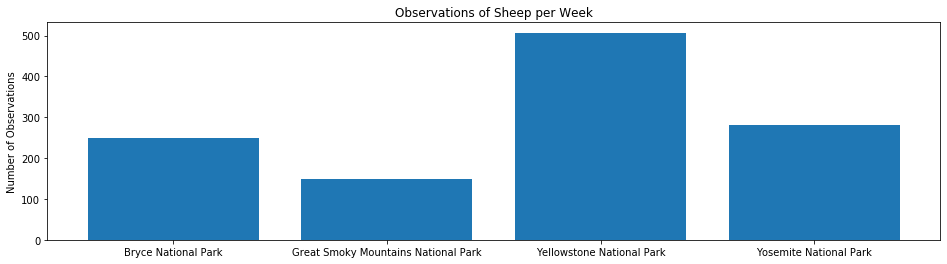

In [33]:
# Summarizing the above information into a graph 
plt.figure(figsize=(16,4))
ax = plt.subplot()
ax.bar(range(len(obs_by_park['observations'])), obs_by_park['observations'].values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park['park_name'].values)
ax.set_ylabel('Number of Observations')
ax.set_title('Observations of Sheep per Week')
plt.show()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage points.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Using <a href="https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html">Codecademy's sample size calculator</a> to calculate the number of sheep that they would need to observe from each park.  Using the default level of significance (90%).

In [34]:
# Calculating number of sheep that would need to be observed from each park

In [35]:
# Baseline conversion rate = 15%
# Statistical significance = 90% 
# Minimum detectable effect = ~33.33% (5 percentage points on 15%)
minimum_detectable_effect = 100 * 0.05 / 0.15
sample_size_per_variant = 870


870 sheeps should be observed in each park to define whether the program aimed at reducing the rate of foot and mouth disease among sheep does work. 

In [36]:
weeks_required = 870/507 
print(weeks_required)

1.7159763313609468


To observe enough sheep at Bryce National Park, for example, it wou take three and a half weeks. 
In Yellowstone, it would only take less than 2 weeks: 1.7 weeks.  
